In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
# load and investigate the data here:
df = pd.read_csv('tennis_stats.csv')

print(df)
print(df.columns)
print(df.describe())

                     Player  Year  FirstServe  FirstServePointsWon  \
0               Pedro Sousa  2016        0.88                 0.50   
1           Roman Safiullin  2017        0.84                 0.62   
2               Pedro Sousa  2017        0.83                 0.60   
3       Rogerio Dutra Silva  2010        0.83                 0.64   
4      Daniel Gimeno-Traver  2017        0.81                 0.54   
...                     ...   ...         ...                  ...   
1716             Yann Marti  2010        0.41                 0.66   
1717          Mikhail Elgin  2012        0.41                 0.60   
1718  Alexander Kudryavtsev  2012        0.40                 0.64   
1719           Ivan Nedelko  2011        0.37                 0.30   
1720       Alexander Zverev  2013        0.36                 0.50   

      FirstServeReturnPointsWon  SecondServePointsWon  \
0                          0.38                  0.50   
1                          0.26              

In [15]:
# perform exploratory analysis here:
print(df.corr())

                                Year  FirstServe  FirstServePointsWon  \
Year                        1.000000    0.051406            -0.016728   
FirstServe                  0.051406    1.000000            -0.070659   
FirstServePointsWon        -0.016728   -0.070659             1.000000   
FirstServeReturnPointsWon  -0.106784    0.025488             0.021729   
SecondServePointsWon        0.005300    0.101417             0.320765   
SecondServeReturnPointsWon -0.039087   -0.001924            -0.004724   
Aces                       -0.108367    0.048149             0.460323   
BreakPointsConverted       -0.072404   -0.018877            -0.041538   
BreakPointsFaced           -0.101735    0.057709             0.301925   
BreakPointsOpportunities   -0.114806    0.062345             0.324853   
BreakPointsSaved           -0.006154    0.087945             0.405751   
DoubleFaults               -0.071885   -0.005477             0.373321   
ReturnGamesPlayed          -0.108405    0.071776   

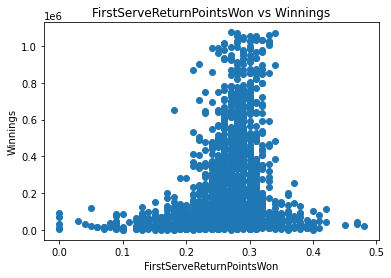

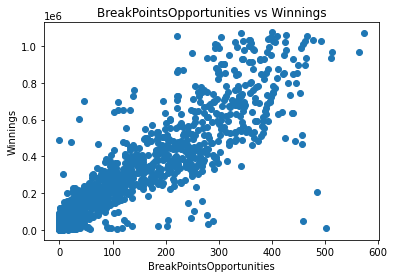

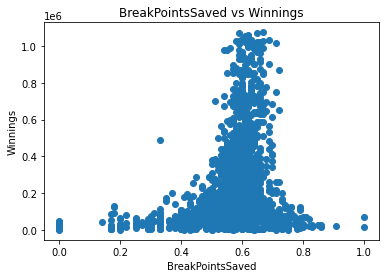

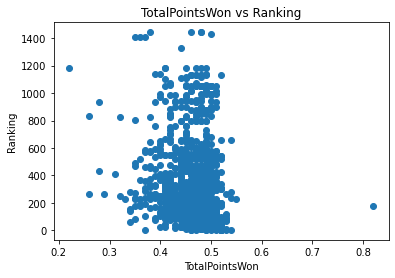

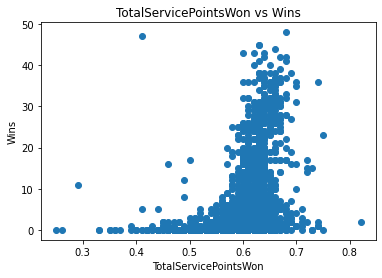

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(df['FirstServeReturnPointsWon'],df['Winnings'])
plt.title('FirstServeReturnPointsWon vs Winnings')
plt.xlabel('FirstServeReturnPointsWon')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(df['BreakPointsOpportunities'],df['Winnings'])
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(df['BreakPointsSaved'],df['Winnings'])
plt.title('BreakPointsSaved vs Winnings')
plt.xlabel('BreakPointsSaved')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(df['TotalPointsWon'],df['Ranking'])
plt.title('TotalPointsWon vs Ranking')
plt.xlabel('TotalPointsWon')
plt.ylabel('Ranking')
plt.show()
plt.clf()

plt.scatter(df['TotalServicePointsWon'],df['Wins'])
plt.title('TotalServicePointsWon vs Wins')
plt.xlabel('TotalServicePointsWon')
plt.ylabel('Wins')
plt.show()
plt.clf()


In [28]:
## perform single feature linear regressions here:
features = df[['FirstServeReturnPointsWon']]
winnings = df[['Winnings']]

features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)
model = LinearRegression()
model.fit(features_train,winnings_train)

print('Predicting Winnings with FirstServeReturnPointsWon Test Score:', model.score(features_test,winnings_test))

winnings_prediction = model.predict(features_test)


Predicting Winnings with FirstServeReturnPointsWon Test Score: 0.07553752467024777


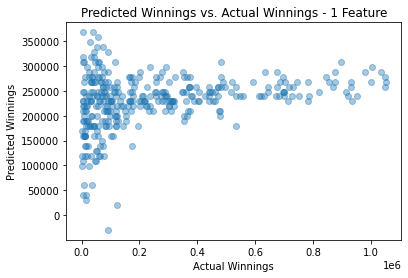

In [29]:
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

Predicting Winnings with BreakPointsOpportunities Test Score: 0.8011432309769454


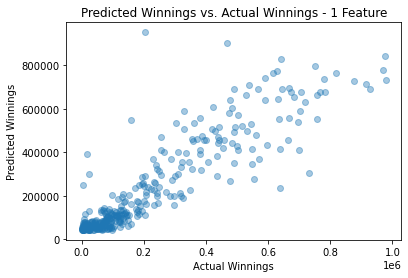

In [35]:
features = df[['BreakPointsOpportunities']]
winnings = df[['Winnings']]

features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)
model = LinearRegression()
model.fit(features_train,winnings_train)

print('Predicting Winnings with BreakPointsOpportunities Test Score:', model.score(features_test,winnings_test))

winnings_prediction = model.predict(features_test)
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

In [33]:
## perform two feature linear regressions here:
features = df[['BreakPointsOpportunities','FirstServeReturnPointsWon']]
winnings = df[['Winnings']]
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)
model = LinearRegression()
model.fit(features_train,winnings_train)
print('Predicting Winnings with 2 Features Test Score:', model.score(features_test,winnings_test))
winnings_prediction = model.predict(features_test)


Predicting Winnings with 2 Features Test Score: 0.703514536816616


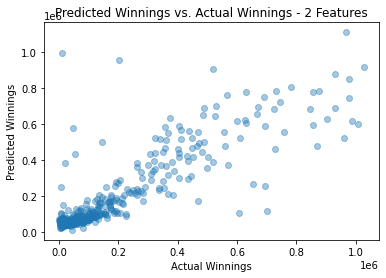

In [34]:
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

In [38]:
features = df[['BreakPointsFaced','Losses']]
winnings = df[['Winnings']]
features_train, features_test, winnings_train, winning_test = train_test_split(features, winnings, train_size = 0.8)
model = LinearRegression()
model.fit(features_train,winnings_train)
print('Predicting Winnings with 2 Features Test Score:', model.score(features_test,winnings_test))
winning_prediction = model.predict(features_test)

Predicting Winnings with 2 Features Test Score: -1.0129219084587886


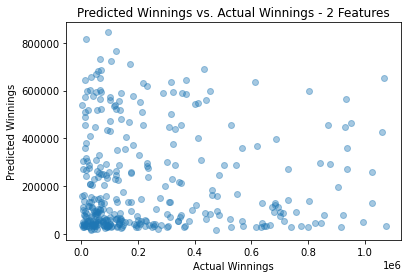

In [39]:
plt.scatter(winning_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

In [41]:
## perform multiple feature linear regressions here:
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon','SecondServePointsWon','SecondServeReturnPointsWon','Aces','BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities','BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon','TotalServicePointsWon']]
winnings = df[['Winnings']]
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)
model = LinearRegression()
model.fit(features_train,winnings_train)
print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test,winnings_test))
winnings_prediction = model.predict(features_test)


Predicting Winnings with Multiple Features Test Score: 0.8335023271124673


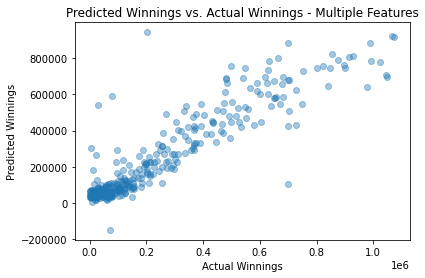

In [42]:
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()